
```{r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE)
```

# Installing packages necessary for cleaning and visualizing

```{r}
install.packages("janitor")
install.packages("lubridate")
install.packages("librarian")
install.packages("geosphere")
```



```{r}
library(tidyverse)
library(lubridate)
library(janitor)
library(librarian)
library(geosphere)
library(dplyr)
```



# Using read.csv to add the data


```{r}
april_2020 <- read.csv("april_2020_tripdata.csv")

may_2020 <- read.csv("may_2020_tripdata.csv")

june_2020 <- read.csv("june_2020_tripdata.csv")

july_2020 <- read.csv("july_2020_tripdata.csv")

august_2020 <- read.csv("august_2020_tripdata.csv")

september_2020 <- read.csv("september_2020_tripdata.csv")

october_2020 <- read.csv("october_2020_tripdata.csv")

november_2020 <- read.csv("november_2020_tripdata.csv")

december_2020 <- read.csv("december_2020_tripdata.csv")

january_2021 <- read.csv("january_2021_tripdata.csv")

february_2021 <- read.csv("february_2021_tripdata.csv")

march_2021 <- read.csv("march_2021_tripdata.csv")
```

# I thought it would be better to just combine all files and deal with the entire year's data all at once instead of going one by one or quarter by quarter. Used "rbind ()" to combine all the files.

```{r}
bike_rides <- rbind(april_2020,may_2020,june_2020,july_2020,august_2020,september_2020,october_2020,november_2020,december_2020,january_2021,february_2021,march_2021)

bike_rides <- remove_empty(bike_rides, which = c("rows", "cols"))


# distHaversine is a function that gives us the distance travelled by comparing the coordinates (lat, lng) of start and end locations
 
bike_rides$distance <- distHaversine(cbind(bike_rides$start_lng, bike_rides$start_lat), cbind(bike_rides$end_lng, bike_rides$end_lat))

# Getting rid of any unwanted rows

bike_rides <- filter(bike_rides, bike_rides$started_at > 0, bike_rides$ended_at > 0)

# Converting the distance from M to KM

bike_rides$distance_km <- bike_rides$distance / 1000
```


```{r}
bike_rides <- bike_rides %>% 
  select(ride_id, started_at, ended_at, start_station_name, end_station_name, member_casual, rideable_type, distance_km, day_of_week, ride_length) %>% 
  na.omit(start_station_name)


bike_rides$max_ride <- max(bike_rides$ride_length)

bike_rides$min_ride <- min(bike_rides$ride_length)

bike_rides$mode_days <- mode(bike_rides$day_of_week)

bike_rides$average_distance <- mean(bike_rides$distance_km)

```
<head> Just some code I tried to come up with the difference between end and start time. </head>
# ```{r}
# bike_rides$started_at <- mdy_hms(bike_rides$started_at)
# 
# bike_rides$ended_at <- mdy_hms(bike_rides$ended_at)
# ```

# ```{r}
# bike_rides$hours <- difftime(bike_rides$ended_at, bike_rides$started_at, units = ("hours"))
# 
# bike_rides$mins <- difftime(bike_rides$ended_at, bike_rides$started_at, units = ("mins"))
# ```
# 
# ```{r}
# df <- bike_rides %>% filter(hours > 0) %>% 
#   drop_na()
# ```
# 
# ```{r}
# df <- df %>% select(started_at, ended_at, start_station_name, end_station_name, member_casual, rideable_type, hours, mins)
# ```



# Here comes the visualization part


# This gives us a plot chart which shows the distance travelled by members and casual riders, and both are differentiated by color

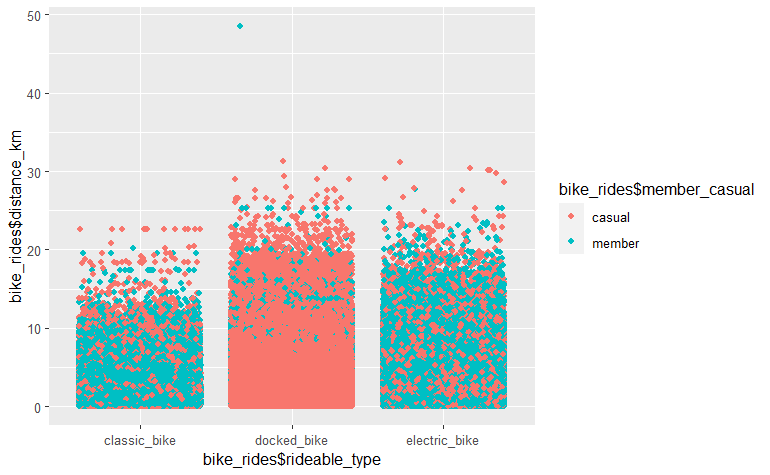

```{r}
ggplot(bike_rides) + geom_dotplot(aes(x = bike_rides$distance_km , y = bike_rides$member_casual, fill = bike_rides$member_casual)) +
  theme(axis.text.x = element_text(angle = 25))
```

# Now we create a bar chart which shows how active the two types of users were on different days of the week


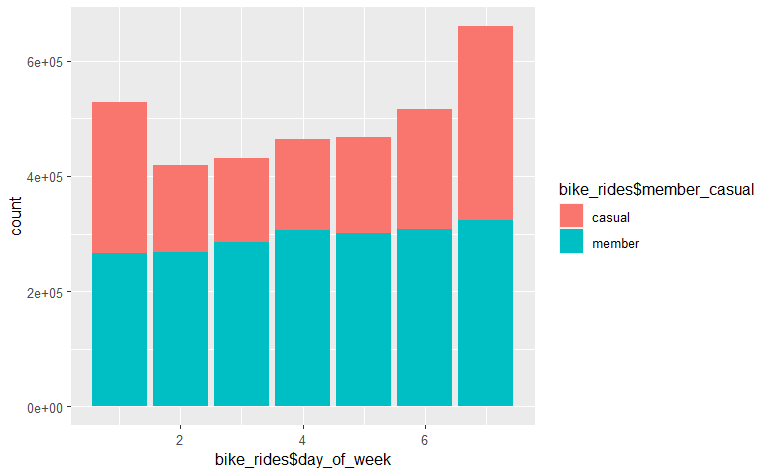

```{r}

ggplot(bike_rides) + geom_bar(aes(x = bike_rides$day_of_week, fill = bike_rides$member_casual))

```

# Created a jitter chart to find out which type of bike was preferred by different users when travelling long vs short distances



```{r}
ggplot(bike_rides) + geom_jitter(aes(x = bike_rides$rideable_type, y = bike_rides$distance_km, color = bike_rides$member_casual))
```

# Created another dotplot but this time used facet_wrap to make the differences between member vs casual riders even more clear in terms of distance travelled
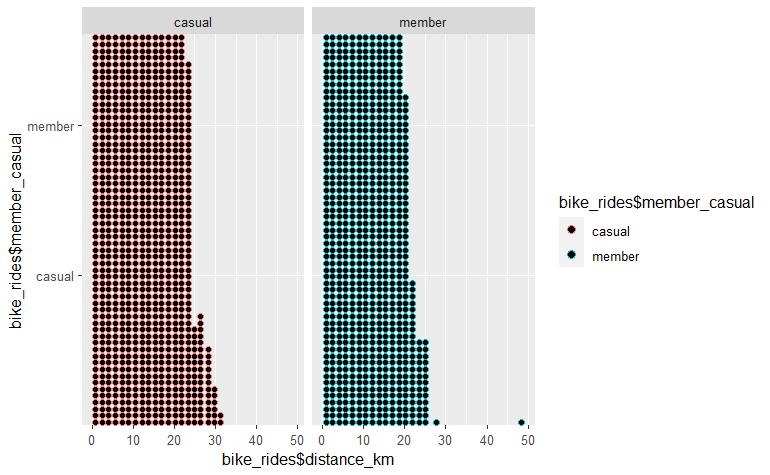

```{r}
ggplot(bike_rides) + geom_dotplot(aes(x = bike_rides$distance_km, y = bike_rides$member_casual, color = bike_rides$member_casual)) +
  facet_wrap(~bike_rides$member_casual)
```


<h> Conclusion </h>

<p> 1. How do annual members and casual riders use Cyclistic bikes differently? 
    The biggest difference between the two types of riders is that, casual riders mostly use the service over the weekend. Whereas members use  the service all througout the week. And casual riders use docked bikes the most.
</p>

<p> 2. Why would casual riders buy Cyclistic annual memberships?
    Casual riders might consider buying a membership if there were some attractive offers on docked bike and some additional perks over the weekends that would be a part of the membership.
    
    3.How can Cyclistic use digital media to influence casual riders to become members?
    
    Creating a good interactive community that uploads pictures/videos on a regular basis and also adding a "streaks" feature to its app that 
    gives the users an incentive to bike everyday, would be very useful in adding new members.
</p>


